# Chapter 2 | K-nearest neighbors (KNN)

This Jupyter Notebook is a supplement for the [Machine Learning For Everyone](ml4everyonebook.com) book.

> Let's recall what we covered in Chapter 2. We have a hypothetical data table containing 20 fruits that are a mix of `apples`, `mandarins`, and `lemons` For each fruit, we have measured it’s `height` and `width` and recorded them as the first two columns of the table. For each fruit we know its `type`, or class label, and this is represented by the last column:

| height | width | fruit |
| ----------- | ----------- | ----------- |
| 3.91 | 5.76 | Mandarin |
| 7.09 | 7.69 | Apple |
| 10.48 | 7.32 | Lemon |
| 9.21 | 7.20 | Lemon |
| 7.95 | 5.90 | Lemon |
| 4.30 | 5.88 | Mandarin |
| 7.62 | 7.51 | Apple |
| 8.42 | 5.99 | Lemon |
| 7.15 | 7.43 | Apple |
| 4.69 | 6.19 | Mandarin |
| 7.50 | 5.99 | Lemon |
| 7.11 | 7.02 | Apple |
| 4.15 | 5.60 | Mandarin |
| 7.29 | 8.38 | Apple |
| 8.49 | 6.52 | Lemon |
| 7.44 | 7.89 | Apple |
| 7.86 | 7.60 | Apple |
| 4.40 | 5.90 | Mandarin |
| 8.10 | 6.15 | Lemon |
| 8.69 | 5.82 | Lemon |

> The structure of this notebook is identical to the structure of Chapter 2: Overview of Supervised Learning. That means, we will sequentially:

> 1. re-create a hypothetical data table with fruits measurements in Python
> 2. visualize the dataset in the graph
> 2. build a KNN classifier by training it with the dataset
> 4. predict new values with classifier
> 5. visualize decision boundaries of KNN classifier
> 6. 

In [79]:
import matplotlib.pyplot as plt # Load matplotlib library for visualization
from matplotlib.colors import ListedColormap
import pandas as pd  #import pandas for data manipulations
import numpy as np
import seaborn as sns

def plotFruitFigure():
    # Define variables for graph
    apple_height, apple_width = df.height[df.fruit == 'Apple'], df.width[df.fruit == 'Apple']
    mandarin_height, mandarin_width = df.height[df.fruit == 'Mandarin'], df.width[df.fruit == 'Mandarin']
    lemon_height, lemon_width = df.height[df.fruit == 'Lemon'], df.width[df.fruit == 'Lemon']

    # Initialize the graph
    fig, ax = plt.subplots()
    plt.gca().set_aspect('equal', adjustable='box')

    # Plot defined variables on it
    ax.plot(apple_height, apple_width, 'o', color='r', label='apple')
    ax.plot(mandarin_height, mandarin_width, 'o', color='g', label='mandarin')
    ax.plot(lemon_height, lemon_width, 'o', color='b', label='lemon')

    # Show legend and configure graph's size
    plt.legend()
    plt.ylim(3, 10) 
    plt.xlim(3, 11)
    

def plotKNN(n_neighbors=int,
            plot_height=df['height'], 
            plot_width=df['width'],
            plot_labels=df.fruit.values, 
            plot_data=True):
    
    # Turn categorical target variable into numerical to make a graph
    X = df[['height', 'width']].values
    y_encoded = df["fruit"].astype('category').cat.codes #encoded y


    # Create color maps for graph
    cmap_light = ListedColormap(['pink', 'lightblue', 'lightgreen'])
    cmap_bold = ['green', 'red', 'blue']

    # We want to visualize KNN with 1 nearest neighbor.
    # Let's initialize the model and train it with the dataset
    clf = KNeighborsClassifier(n_neighbors = n_neighbors)
    clf.fit(X, y_encoded)

    # Plot the decision boundary. For that, we will assign a color to each point in the mesh
    x_min, x_max = X[:, 0].min() - 3, X[:, 0].max() + 3
    y_min, y_max = X[:, 1].min() - 3, X[:, 1].max() + 3

    h = .02  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=cmap_light)
    
    if plot_data==True:
        # Plot also the dataset observations
        sns.scatterplot(x=plot_height, 
                        y=plot_width,#y=X[:, 1], 
                        hue=plot_labels,#df.fruit.values,
                        palette=cmap_bold, 
                        alpha=1.0, 
                        edgecolor="black")

    # Configure the graph
    plt.ylim(3, 10) 
    plt.xlim(3, 11)
    plt.gca().set_aspect('equal', adjustable='box')

    plt.title(f'KNN Fruits Classifier, n={n_neighbors}')
    plt.xlabel("height")
    plt.ylabel("width")  

## 1. Compose the table

> To create a table, we use `pandas` library - a library that manages **PAN**el **DA**ta **S**ets.

In [60]:
# Create a hypothetical dataset from the book
data = {'height': [3.91, 7.09, 10.48, 9.21, 7.95, 4.30, 7.62, 8.42, 7.15, 4.69, 7.50, 7.11, 4.15, 7.29, 8.49, 7.44, 7.86, 4.40, 8.10, 8.69], 
        'width': [5.76, 7.69, 7.32, 7.20, 5.90, 5.88, 7.51, 5.99, 7.43, 6.19, 5.99, 7.02, 5.60, 8.38, 6.52, 7.89, 7.60, 5.90, 6.15, 5.82],
        'fruit': ['Mandarin', 'Apple', 'Lemon', 'Lemon', 'Lemon', 'Mandarin', 'Apple', 'Lemon', 'Apple', 'Mandarin', 'Lemon', 'Apple', 'Mandarin', 'Apple', 'Lemon', 'Apple', 'Apple', 'Mandarin', 'Lemon', 'Lemon']
       }  

# Create DataFrame df using pandas library
df = pd.DataFrame(data)  
  
# Print the output
df

,height,width,fruit
0,3.91,5.76,Mandarin
1,7.09,7.69,Apple
2,10.48,7.32,Lemon
3,9.21,7.20,Lemon
4,7.95,5.90,Lemon
5,4.30,5.88,Mandarin
6,7.62,7.51,Apple
7,8.42,5.99,Lemon
8,7.15,7.43,Apple
9,4.69,6.19,Mandarin


## 2. Visualize data points

> Let's now make the same graph that we had in the book.

In [61]:
# # Load matplotlib library for visualization
# import matplotlib.pyplot as plt

# def plotFruitFigure():
#     # Define variables for graph
#     apple_height, apple_width = df.height[df.fruit == 'Apple'], df.width[df.fruit == 'Apple']
#     mandarin_height, mandarin_width = df.height[df.fruit == 'Mandarin'], df.width[df.fruit == 'Mandarin']
#     lemon_height, lemon_width = df.height[df.fruit == 'Lemon'], df.width[df.fruit == 'Lemon']

#     # Initialize the graph
#     fig, ax = plt.subplots()
#     plt.gca().set_aspect('equal', adjustable='box')

#     # Plot defined variables on it
#     ax.plot(apple_height, apple_width, 'o', color='r', label='apple')
#     ax.plot(mandarin_height, mandarin_width, 'o', color='g', label='mandarin')
#     ax.plot(lemon_height, lemon_width, 'o', color='b', label='lemon')

#     # Show legend and configure graph's size
#     plt.legend()
#     plt.ylim(3, 10) 
#     plt.xlim(3, 11)

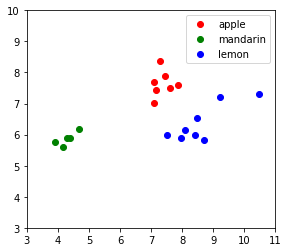

In [62]:
plotFruitFigure()

## 3. Building KNN Classifier

> Let's build a classifier and use it to predict some values. Firstly, we define `X` and `y`:

In [63]:
# Define X and y using the dataset

X = df[['height', 'width']].values
y = df.fruit.values


In [64]:
df

,height,width,fruit
0,3.91,5.76,Mandarin
1,7.09,7.69,Apple
2,10.48,7.32,Lemon
3,9.21,7.20,Lemon
4,7.95,5.90,Lemon
5,4.30,5.88,Mandarin
6,7.62,7.51,Apple
7,8.42,5.99,Lemon
8,7.15,7.43,Apple
9,4.69,6.19,Mandarin


> Second, we **initialize** our `KNN` algorithm and **train** it with X and y.

In [54]:
# Import a KNN library
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN model with 1 nearest neighbor
clf = KNeighborsClassifier(n_neighbors = 1)

# Feed the dataset into the model to train
clf.fit(X, y)

KNeighborsClassifier(n_neighbors=1)

## 4. Predicting unknown values

> Let's predict unknown fruits using our trained classifier:

In [55]:
# Let's try to predict the label for an unknown fruit with width of 9cm and height of 3cm
clf.predict([[9, 3]])

array(['Lemon'], dtype=object)

In [56]:
# We can predict values for a whole bunch of them!
clf.predict([[9, 3], [4, 5], [2, 5], [8, 9], [5, 7]])

array(['Lemon', 'Mandarin', 'Mandarin', 'Apple', 'Mandarin'], dtype=object)

## 5. Vizualizing KNN decision boundaries

> Let's visualize the decision boundaries of KNN in a graph, like we did in the book.

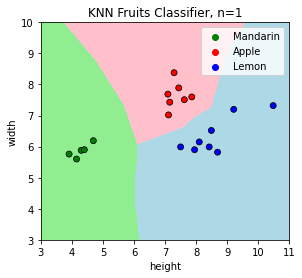

In [65]:
plotKNN(1)

## 6. Missclassifications

> Imagine we have new fuits with the following properties:

| height | width | fruit |
| ----------- | ----------- | ----------- |
| 6 | 7 | Apple |
| 7 | 6.5 | Lemon |
| 4 | 6 | Mandarin |

> Let's see if our model would correctly predict the fruit label by showing fruits' measurements and not revealing their labels. Let's pick 6 nearest neighbors:

In [66]:
# Again, let's initialize the model
clf = KNeighborsClassifier(n_neighbors = 1)
clf.fit(X, y)

# Predict observations
pred1 = clf.predict([[6, 7]]) 
pred2 = clf.predict([[7, 6.5]])
pred3 = clf.predict([[4, 6]])

# Print the results
print(f'first actual observation is Apple. The model predicted {pred1}', 
     f'\n second actual observation is Lemon. The model predicted {pred2}',
     f'\n third actual observation is Mandarin. The model predicted {pred3}')

first actual observation is Apple. The model predicted ['Apple'] 
 second actual observation is Lemon. The model predicted ['Apple'] 
 third actual observation is Mandarin. The model predicted ['Mandarin']


> The model incorrectly predicted the second observation. This is called misclassification - the model predicted the label that was actually incorrect. That reminds me to go further and explain how do we test our model after it was trained. 

## Testing the Model

> Testing the model is just a procedure to evaluate model's accuracy. It's done by comparing model's predicted values with actual results. 

In [ ]:
# First, we predict labels for X
y_pred = clf.predict(X)
print(f'predicted labels: \n\n {y_pred}')

> `y_pred` is predicted by the model fruit labels. Because we also know actual labels `y`:

In [ ]:
print(f'actual labels: \n\n {y}')

> We can easily calculate the difference between predicted and actual values. The more the difference between these two, the worse the model is at correct predictions. We can use a ready-to-use library from sklearn called `metrics`

In [ ]:
# Load metrics
from sklearn import metrics

# Give y and y_pred
print(metrics.accuracy_score(y, y_pred))

> 1 means 100% accuracy. Hold on.. That's because we tested the model with the same dataset `X` that we used to train it! In other words, we tried to predict the values (that's `y_pred = clf.predict(X)`) that we used to train the model (`clf.fit(X, y)`). 

> The model is always tested on the observations it has not seen before, i.e. observations that did not participate in model training. One of the ways is to split the dataset into **two chunks** of data, and then use one chunk to train the model, and another one to test it. 

In [ ]:
# STEP 1: Split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,       # specifying X
                                                    y_encoded,  # specifying y
                                                    test_size=0.4 #split dataset into 60% training and 40% testing
                                                   )

> let's train our classifier

In [162]:
# # STEP 2: Again, initialize the model
clf = KNeighborsClassifier(n_neighbors = 1)
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [163]:
# STEP 3: make predictions on the testing set
y_pred = clf.predict(X_test)

In [164]:
# STEP 4: compare actual response values (y_test) with predicted response values (y_pred)
print(metrics.accuracy_score(y_test, y_pred))

0.0


## Overfitting and Underfitting

Training and Test error curves as we vary the hyper-parameter K, the number of neighbors. The left shows an under-fit model which uses too large of a neighborhood K = n. The right of the plot shows an over-fit model which uses too small of a neighborhood K = 1.

In [ ]:
# Load required libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap


# Create color maps for graph
cmap_light = ListedColormap(['pink', 'lightblue', 'lightgreen'])
cmap_bold = ['red', 'blue', 'green']

# We want to visualize KNN with 1 nearest neighbor.
# Let's initialize the model and train it with the dataset
clf = KNeighborsClassifier(n_neighbors = 1)
clf.fit(X_train, y_train)

# Plot the decision boundary. For that, we will assign a color to each point in the mesh
x_min, x_max = X_train[:, 0].min() - 3, X_train[:, 0].max() + 3
y_min, y_max = X_train[:, 1].min() - 3, X_train[:, 1].max() + 3

h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cmap_light)

# Plot also the dataset observations
sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=y_train,
                palette=cmap_bold, alpha=1.0, edgecolor="black")

# Configure the graph
plt.ylim(3, 10) 
plt.xlim(3, 11)
plt.gca().set_aspect('equal', adjustable='box')

plt.title("KNN Fruits Classifier, n=1")
plt.xlabel("height")
plt.ylabel("width")

In [ ]:
# # Load required libraries
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# from matplotlib.colors import ListedColormap


# # Turn categorical target variable into numerical to make a graph
# y_encoded = df["fruit"].astype('category').cat.codes #encoded

# # Create color maps for graph
# cmap_light = ListedColormap(['pink', 'lightblue', 'lightgreen'])
# cmap_bold = ['green', 'red', 'blue']

# # We want to visualize KNN with 1 nearest neighbor.
# # Let's initialize the model and train it with the dataset
# clf = KNeighborsClassifier(n_neighbors = 1)
# clf.fit(X, y_encoded)

# # Plot the decision boundary. For that, we will assign a color to each point in the mesh
# x_min, x_max = X[:, 0].min() - 3, X[:, 0].max() + 3
# y_min, y_max = X[:, 1].min() - 3, X[:, 1].max() + 3

# h = .02  # step size in the mesh
# xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
#                      np.arange(y_min, y_max, h))

# Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# # Put the result into a color plot
# Z = Z.reshape(xx.shape)
# plt.contourf(xx, yy, Z, cmap=cmap_light)

# # Plot also the dataset observations
# sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=df.fruit.values,
#                 palette=cmap_bold, alpha=1.0, edgecolor="black")

# # Configure the graph
# plt.ylim(3, 10) 
# plt.xlim(3, 11)
# plt.gca().set_aspect('equal', adjustable='box')

# plt.title("KNN Fruits Classifier, n=1")
# plt.xlabel("height")
# plt.ylabel("width")

In [72]:

# Import pandas 
import pandas as pd  

# Create a hypothetical dataset from the book
data = {'height': [3.91, 7.09, 10.48, 9.21, 7.95, 4.30, 7.62, 8.42, 7.15, 4.69, 7.50, 7.11, 4.15, 7.29, 8.49, 7.44, 7.86, 4.40, 8.10, 8.69], 
        'width': [5.76, 7.69, 7.32, 7.20, 5.90, 5.88, 7.51, 5.99, 7.43, 6.19, 5.99, 7.02, 5.60, 8.38, 6.52, 7.89, 7.60, 5.90, 6.15, 5.82],
        'fruit': ['Mandarin', 'Apple', 'Lemon', 'Lemon', 'Lemon', 'Mandarin', 'Apple', 'Lemon', 'Apple', 'Mandarin', 'Lemon', 'Apple', 'Mandarin', 'Apple', 'Lemon', 'Apple', 'Apple', 'Mandarin', 'Lemon', 'Lemon']
       }  
df = pd.DataFrame(data) 

new_data = {'height': [7.95, 3.93, 5.5],
            'width': [5.32, 6.12, 4.5],
            'fruit': ['Mandarin', 'Apple', 'Lemon']
           }

# Create DataFrame df using pandas library
new_points = pd.DataFrame(new_data)  
  
# Print the output
df = pd.concat([df, new_points])

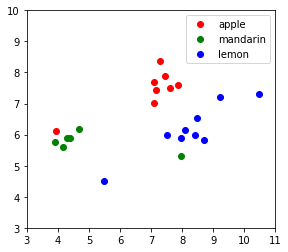

In [74]:
plotFruitFigure()

In [75]:
# # Load matplotlib library for visualization
# import matplotlib.pyplot as plt


# # Define variables for graph
# apple_height, apple_width = df.height[df.fruit == 'Apple'], df.width[df.fruit == 'Apple']
# mandarin_height, mandarin_width = df.height[df.fruit == 'Mandarin'], df.width[df.fruit == 'Mandarin']
# lemon_height, lemon_width = df.height[df.fruit == 'Lemon'], df.width[df.fruit == 'Lemon']

# # Initialize the graph
# fig, ax = plt.subplots()
# plt.gca().set_aspect('equal', adjustable='box')

# # Plot defined variables on it
# ax.plot(apple_height, apple_width, 'o', color='r', label='apple')
# ax.plot(mandarin_height, mandarin_width, 'o', color='g', label='mandarin')
# ax.plot(lemon_height, lemon_width, 'o', color='b', label='lemon')

# # Show legend and configure graph's size
# plt.legend()
# plt.ylim(3, 10) 
# plt.xlim(3, 11)

In [76]:
# Define X and y using the dataset
# X = df[['height', 'width']].values
# y = df.fruit.values

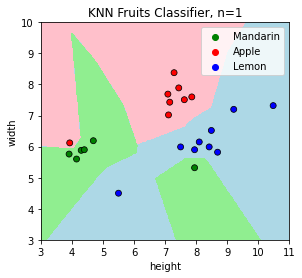

In [80]:
plotKNN(1)

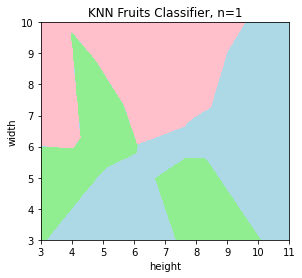

In [81]:
plotKNN(1, plot_data=False)

In [30]:
import numpy as np
height_test = np.array([6.5, 7.5, 4])
width_test = np.array([7, 5, 6.5])
fruit_test = np.array(["Apple", "Lemon", "Mandarin"])




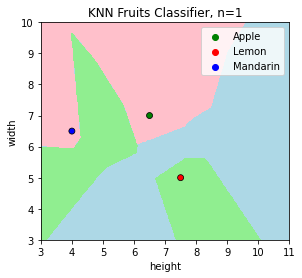

In [82]:
plotKNN(n_neighbors=1, 
        plot_height=height_test,
        plot_width=width_test,
        plot_labels=fruit_test)


# # Load required libraries
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# from matplotlib.colors import ListedColormap

# # Turn categorical target variable into numerical to make a graph
# y_encoded = df["fruit"].astype('category').cat.codes #encoded

# # Create color maps for graph
# cmap_light = ListedColormap(['pink', 'lightblue', 'lightgreen'])
# cmap_bold = ['green', 'red', 'blue']

# # We want to visualize KNN with 1 nearest neighbor.
# # Let's initialize the model and train it with the dataset

# # Import a KNN library
# from sklearn.neighbors import KNeighborsClassifier
# clf = KNeighborsClassifier(n_neighbors = 1)
# clf.fit(X, y_encoded)

# # Plot the decision boundary. For that, we will assign a color to each point in the mesh
# x_min, x_max = X[:, 0].min() - 3, X[:, 0].max() + 3
# y_min, y_max = X[:, 1].min() - 3, X[:, 1].max() + 3

# h = .02  # step size in the mesh
# xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
#                      np.arange(y_min, y_max, h))

# Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# # Put the result into a color plot
# Z = Z.reshape(xx.shape)
# plt.contourf(xx, yy, Z, cmap=cmap_light)




# # Plot also the dataset observations
# sns.scatterplot(x=height_test, y=width_test, hue=fruit_test,
#                 palette=cmap_bold, alpha=1.0, edgecolor="black")

# # Configure the graph
# plt.ylim(3, 10) 
# plt.xlim(3, 11)
# plt.gca().set_aspect('equal', adjustable='box')

# plt.title("KNN Fruits Classifier, n=1")
# plt.xlabel("height")
# plt.ylabel("width")

## Model Complexity

## K = 1

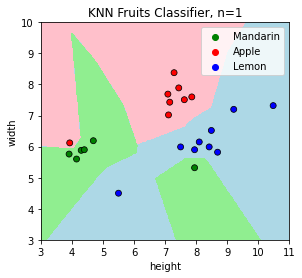

In [83]:
plotKNN(n_neighbors=1)

Text(0, 0.5, 'width')

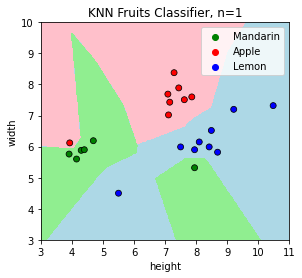

In [66]:

# # Load required libraries
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# from matplotlib.colors import ListedColormap

# # Turn categorical target variable into numerical to make a graph
# y_encoded = df["fruit"].astype('category').cat.codes #encoded

# # Create color maps for graph
# cmap_light = ListedColormap(['pink', 'lightblue', 'lightgreen'])
# cmap_bold = ['green', 'red', 'blue']

# # We want to visualize KNN with 1 nearest neighbor.
# # Let's initialize the model and train it with the dataset

# # Import a KNN library
# from sklearn.neighbors import KNeighborsClassifier
# clf = KNeighborsClassifier(n_neighbors = 1)
# clf.fit(X, y_encoded)

# # Plot the decision boundary. For that, we will assign a color to each point in the mesh
# x_min, x_max = X[:, 0].min() - 3, X[:, 0].max() + 3
# y_min, y_max = X[:, 1].min() - 3, X[:, 1].max() + 3

# h = .02  # step size in the mesh
# xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
#                      np.arange(y_min, y_max, h))

# Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# # Put the result into a color plot
# Z = Z.reshape(xx.shape)
# plt.contourf(xx, yy, Z, cmap=cmap_light)

# # Plot also the dataset observations
# sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=df.fruit.values,
#                 palette=cmap_bold, alpha=1.0, edgecolor="black")

# # Configure the graph
# plt.ylim(3, 10) 
# plt.xlim(3, 11)
# plt.gca().set_aspect('equal', adjustable='box')

# plt.title("KNN Fruits Classifier, n=1")
# plt.xlabel("height")
# plt.ylabel("width")

## K = 2

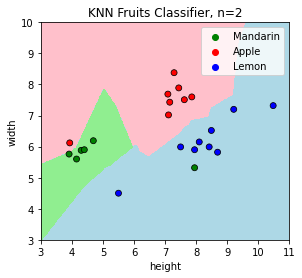

In [33]:
plotKNN(n_neighbors=2)

Text(0, 0.5, 'width')

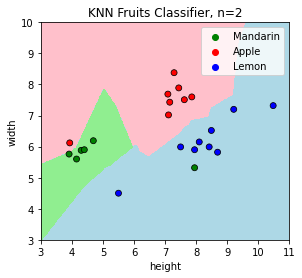

In [70]:
# # Load required libraries
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# from matplotlib.colors import ListedColormap

# # Turn categorical target variable into numerical to make a graph
# y_encoded = df["fruit"].astype('category').cat.codes #encoded

# # Create color maps for graph
# cmap_light = ListedColormap(['pink', 'lightblue', 'lightgreen'])
# cmap_bold = ['green', 'red', 'blue']

# # We want to visualize KNN with 1 nearest neighbor.
# # Let's initialize the model and train it with the dataset

# # Import a KNN library
# from sklearn.neighbors import KNeighborsClassifier
# clf = KNeighborsClassifier(n_neighbors = 2)
# clf.fit(X, y_encoded)

# # Plot the decision boundary. For that, we will assign a color to each point in the mesh
# x_min, x_max = X[:, 0].min() - 3, X[:, 0].max() + 3
# y_min, y_max = X[:, 1].min() - 3, X[:, 1].max() + 3

# h = .02  # step size in the mesh
# xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
#                      np.arange(y_min, y_max, h))

# Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# # Put the result into a color plot
# Z = Z.reshape(xx.shape)
# plt.contourf(xx, yy, Z, cmap=cmap_light)

# # Plot also the dataset observations
# sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=df.fruit.values,
#                 palette=cmap_bold, alpha=1.0, edgecolor="black")

# # Configure the graph
# plt.ylim(3, 10) 
# plt.xlim(3, 11)
# plt.gca().set_aspect('equal', adjustable='box')

# plt.title("KNN Fruits Classifier, n=2")
# plt.xlabel("height")
# plt.ylabel("width")

## K = 5

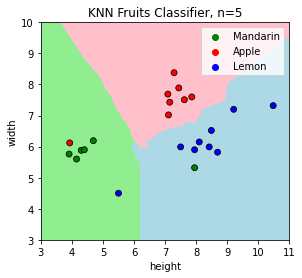

In [34]:
plotKNN(n_neighbors=5)

Text(0, 0.5, 'width')

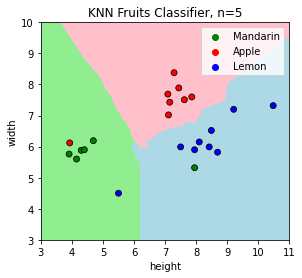

In [71]:
# # Load required libraries
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# from matplotlib.colors import ListedColormap

# # Turn categorical target variable into numerical to make a graph
# y_encoded = df["fruit"].astype('category').cat.codes #encoded

# # Create color maps for graph
# cmap_light = ListedColormap(['pink', 'lightblue', 'lightgreen'])
# cmap_bold = ['green', 'red', 'blue']

# # We want to visualize KNN with 1 nearest neighbor.
# # Let's initialize the model and train it with the dataset

# # Import a KNN library
# from sklearn.neighbors import KNeighborsClassifier
# clf = KNeighborsClassifier(n_neighbors = 5)
# clf.fit(X, y_encoded)

# # Plot the decision boundary. For that, we will assign a color to each point in the mesh
# x_min, x_max = X[:, 0].min() - 3, X[:, 0].max() + 3
# y_min, y_max = X[:, 1].min() - 3, X[:, 1].max() + 3

# h = .02  # step size in the mesh
# xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
#                      np.arange(y_min, y_max, h))

# Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# # Put the result into a color plot
# Z = Z.reshape(xx.shape)
# plt.contourf(xx, yy, Z, cmap=cmap_light)

# # Plot also the dataset observations
# sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=df.fruit.values,
#                 palette=cmap_bold, alpha=1.0, edgecolor="black")

# # Configure the graph
# plt.ylim(3, 10) 
# plt.xlim(3, 11)
# plt.gca().set_aspect('equal', adjustable='box')

# plt.title("KNN Fruits Classifier, n=5")
# plt.xlabel("height")
# plt.ylabel("width")

## K = N

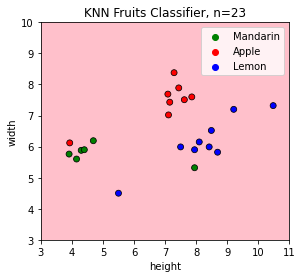

In [36]:
plotKNN(n_neighbors=len(X))

Text(0, 0.5, 'width')

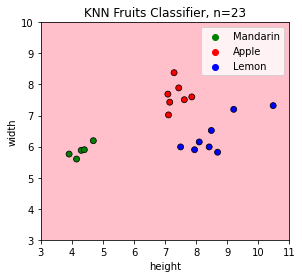

In [8]:
# # Load required libraries
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# from matplotlib.colors import ListedColormap

# # Turn categorical target variable into numerical to make a graph
# y_encoded = df["fruit"].astype('category').cat.codes #encoded

# # Create color maps for graph
# cmap_light = ListedColormap(['pink', 'lightblue', 'lightgreen'])
# cmap_bold = ['green', 'red', 'blue']

# # We want to visualize KNN with 1 nearest neighbor.
# # Let's initialize the model and train it with the dataset

# # Import a KNN library
# from sklearn.neighbors import KNeighborsClassifier
# clf = KNeighborsClassifier(n_neighbors = len(X))
# clf.fit(X, y_encoded)

# # Plot the decision boundary. For that, we will assign a color to each point in the mesh
# x_min, x_max = X[:, 0].min() - 3, X[:, 0].max() + 3
# y_min, y_max = X[:, 1].min() - 3, X[:, 1].max() + 3

# h = .02  # step size in the mesh
# xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
#                      np.arange(y_min, y_max, h))

# Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# # Put the result into a color plot
# Z = Z.reshape(xx.shape)
# plt.contourf(xx, yy, Z, cmap=cmap_light)

# # Plot also the dataset observations
# sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=df.fruit.values,
#                 palette=cmap_bold, alpha=1.0, edgecolor="black")

# # Configure the graph
# plt.ylim(3, 10) 
# plt.xlim(3, 11)
# plt.gca().set_aspect('equal', adjustable='box')

# plt.title("KNN Fruits Classifier, n=23")
# plt.xlabel("height")
# plt.ylabel("width")

In [72]:
len(X)

23

## Train Test Error Curve

In [125]:
from sklearn import metrics


In [180]:
import numpy as np
X_test = np.array([[6.5, 7.5, 4],
                 [7, 5, 6.5]])


# Create a hypothetical dataset from the book
data_test = {'height': [6.5, 7.5, 4],
        'width': [7, 5, 6.5],
        'fruit': ["Apple", "Lemon", "Mandarin"]
       }  

df_test = pd.DataFrame(data_test)


X_test = df_test.iloc[:, :2]

# y_encoded = df["fruit"].astype('category').cat.codes #encoded
y_test = df_test.iloc[:, 2]#.astype('category').cat.codes #encoded


In [182]:
clf = KNeighborsClassifier(n_neighbors = 1)
clf.fit(X, y)


KNeighborsClassifier(n_neighbors=1)

In [185]:
y_pred_test = clf.predict(X_test)
y_pred_test

array(['Apple', 'Mandarin', 'Apple'], dtype=object)

In [197]:
train_scores = []
test_scores = []
k = []

for i in range(1, len(X)+1):
    
    # # STEP 2: Again, initialize the model
    clf = KNeighborsClassifier(n_neighbors = i)
    clf.fit(X, y)

    # STEP 3: make predictions on the testing set
    y_pred_train = clf.predict(X)
    y_pred_test = clf.predict(X_test)

    # STEP 4: compare actual response values (y_test) with predicted response values (y_pred)
    k.append(i)
    train_scores.append(metrics.accuracy_score(y, y_pred_train))
    test_scores.append(metrics.accuracy_score(y_test, y_pred_test))

(0.0, 25.0)

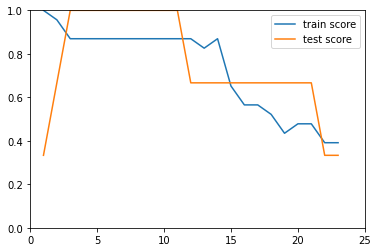

In [203]:
# Load matplotlib library for visualization
import matplotlib.pyplot as plt

# Initialize the graph
fig, ax = plt.subplots()
# plt.gca().set_aspect('equal', adjustable='box')

# Plot defined variables on it
ax.plot(k, train_scores, label='train score')
ax.plot(k, test_scores, label='test score')
# ax.plot(lemon_height, lemon_width, 'o', color='b', label='lemon')

# Show legend and configure graph's size
plt.legend()
plt.ylim(0, 1) 
plt.xlim(0, 25)